In [303]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lmfit import Model
from scipy.stats import linregress
import seaborn as sns

from contact_resistance import Fit

sns.set_theme(style="ticks")
palette = 'BuPu_r'
dpi = 100
sns.set_palette(palette)


In [304]:
def r_t(s, r_s, l_t, N, W, L):
    return (r_s * s / (N * W + (N-1) * (2 *s + L))) + (2 * r_s * l_t / (N * W + (N-1) * (2 *s + L)))
gmodel5 = Model(r_t)
param5 = gmodel5.make_params()
param5['r_s'].set(value = 1e8, min = 0)
param5['l_t'].set(value = 1e-5, min = 1e-9)
param5['L'].set(value = 3200e-4, vary = False)
param5['W'].set(value = 5e-4, vary = False)
param5['N'].set(value = 60, vary = False)

,Contact Resistance,Sheet resistance,Conductivity ($\sigma$),Sample
0G_18,0.235202,2.746428e+09,0.000018,0G_18
0G_13,0.200330,9.171894e+08,0.000055,0G_13


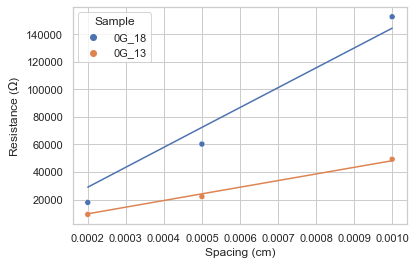

In [305]:
#0G_18 LCR measurement
sns.set_theme(style="whitegrid")
path = r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Contact Resistance\LSB_07\0G_18\C1'
files = [os.path.join(path, i) for i in os.listdir(path)]
cols = ['Spacing (cm)', 'Resistance ($\Omega$)']
a = pd.DataFrame(columns = cols) 
cols_r = ['Contact Resistance', 'Sheet resistance', 'Conductivity ($\sigma$)']
results = pd.DataFrame(columns = cols_r)
n = 0
for i in files:
    df = pd.read_csv(i)
    slope, intercept, r_value, p_value, std_err = linregress(df['Vds'], df['Idc'])
    if i[-5:-4] == '1':
        a.loc[n] = [2e-4,  1 / slope]
    elif i[-5:-4] == '2':
        a.loc[n] = [5e-4,  1 / slope]
    elif i[-5:-4] == '3':
        a.loc[n] = [10e-4,  1 / slope]
    n += 1
a.sort_values(by=[cols[0]], inplace = True)
r = gmodel5.fit(a[cols[1]], param5, s = a[cols[0]])
rc = gmodel5.eval(r.params, s = 0) # 2 times contact resistance
l_t = r.best_values['l_t'] # transfer length
r_s = r.best_values['r_s'] # sheet resistance
sigma = 1 / (r_s * 0.2e-4)
results.loc['0G_18'] = [rc/2, r_s, sigma]
a['Sample'] = '0G_18'

#0G_13 LCR
path = r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Contact Resistance\LSB_07\LCR\0G_13'
files = [os.path.join(path, i) for i in os.listdir(path)]
b = pd.DataFrame(columns = cols)
n = 0
for i in files:
    df = pd.read_csv(i)
    slope, intercept, r_value, p_value, std_err = linregress(df['Vds'], df['Idc'])
    if i[-5:-4] == '1':
        b.loc[n] = [2e-4,  1 / slope]
    elif i[-5:-4] == '2':
        b.loc[n] = [5e-4,  1 / slope]
    elif i[-5:-4] == '3':
        b.loc[n] = [10e-4,  1 / slope]
    n += 1
b.sort_values(by=[cols[0]], inplace = True)
r2 = gmodel5.fit(b[cols[1]], param5, s = b[cols[0]])

rc = gmodel5.eval(r2.params, s = 0) # 2 times contact resistance
l_t = r2.best_values['l_t'] # transfer length
r_s = r2.best_values['r_s'] # sheet resistance
sigma = 1 / (r_s * 0.2e-4)
results.loc['0G_13'] = [rc/2, r_s, sigma]
b['Sample'] = '0G_13'
ab = pd.concat([a,b])

results['Sample'] = ''
results.at['0G_13', 'Sample'] = '0G_13'
results.at['0G_18', 'Sample'] = '0G_18'

#Plot

sns.scatterplot(data = ab, x = cols[0], y = cols[1], hue = 'Sample')

plt.plot(a[cols[0]], r.best_fit)
plt.plot(b[cols[0]], r2.best_fit)

results.head()

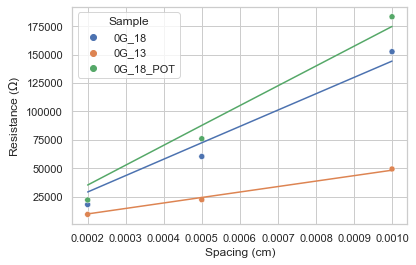

,Contact Resistance,Sheet resistance,Conductivity ($\sigma$),Sample
0G_18,0.235202,2.746428e+09,0.000018,0G_18
0G_13,0.200330,9.171894e+08,0.000055,0G_13
0G_18_POT,0.202642,3.327341e+09,0.000015,0G_18_POT


<Figure size 432x288 with 0 Axes>

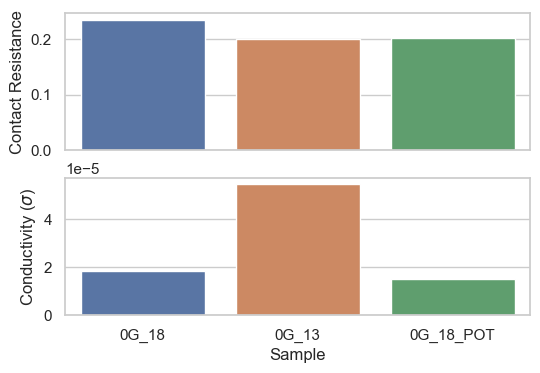

In [306]:
#0G_18 potentiostat


path = r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Contact Resistance\LSB_07\0G_18\Potentiostat'
files = [os.path.join(path, i) for i in os.listdir(path)]
cols_ = ['Potential', 'Current', 'Time']
cols2 = ['Spacing (cm)', 'Resistance ($\Omega$)']
c = pd.DataFrame(columns = cols2)
n = 0
for i in files:
    df = pd.read_csv(i, names = cols_, skiprows = 1, sep = ';')
    slope, intercept, r_value, p_value, std_err = linregress(df['Potential'], df['Current'])
    if i[-5:-4] == '1':
        c.loc[n] = [2e-4,  1 / slope]
    elif i[-5:-4] == '2':
        c.loc[n] = [5e-4,  1 / slope]
    elif i[-5:-4] == '3':
        c.loc[n] = [10e-4,  1 / slope]
    elif i[-5:-4] == '4':
        c.loc[n] = [20e-4,  1 / slope]
    n += 1
c.sort_values(by = [cols2[1]], inplace=True)

result = gmodel5.fit(c[cols2[1]], param5, s = c[cols2[0]])
rc = gmodel5.eval(result.params, s = 0) # 2 times contact resistance
l_t = result.best_values['l_t'] # transfer length
r_s = result.best_values['r_s'] # sheet resistance
sigma = 1 / (r_s * 0.2e-4)
results.loc['0G_18_POT'] = [rc/2, r_s, sigma, 0]
c['Sample'] = '0G_18_POT'
results.at['0G_18_POT', 'Sample'] = '0G_18_POT'

abc = pd.concat([ab, c])
sns.scatterplot(data = abc, x = cols2[0], y = cols2[1], hue = 'Sample')

plt.plot(a[cols[0]], r.best_fit)
plt.plot(b[cols[0]], r2.best_fit)
plt.plot(c[cols[0]], result.best_fit)


plt.show()
plt.clf()

#results.drop(index = ['0G_13'], inplace = True)
results.head()

fig, ax = plt.subplots(2, 1, dpi = 100, sharex = True)
#ax2 = ax.twinx()
sns.barplot(data = results, x = 'Sample', y = cols_r[0], ax= ax[0])
sns.barplot(data = results, x = 'Sample', y = cols_r[2], ax = ax[1])
ax[0].set_xlabel('')

#fig, ax = plt.subplots(dpi =100)
#sns.barplot(data = results)

results.head()

C:\Users\lopezb41\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
C:\Users\lopezb41\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


,Contact Resistance,Sheet resistance,Conductivity ($\sigma$),Sample
0G_18_POT_2,0.229888,4.254136e+09,0.000012,0G_18_POT


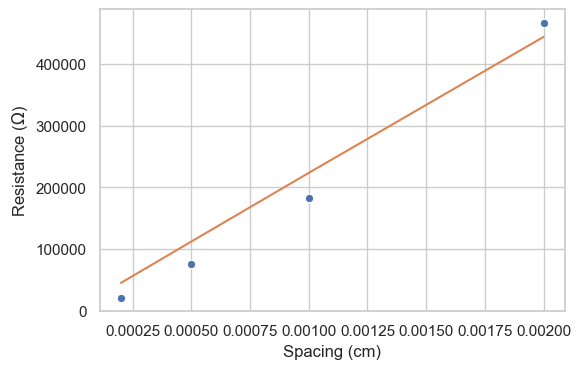

In [307]:
# Data in potentiostat

path = r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Contact Resistance\LSB_07\0G_18\Potentiostat extra'
files = [os.path.join(path, i) for i in os.listdir(path)]
d = pd.DataFrame(columns = cols2)
results_pot = pd.DataFrame(columns = cols_r)
n = 0
for i in files:
    df = pd.read_csv(i, names = cols_, skiprows = 1, sep = ';')
    slope, intercept, r_value, p_value, std_err = linregress(df['Potential'], df['Current'])
    if i[-5:-4] == '1':
        d.loc[n] = [2e-4,  1 / slope]
    elif i[-5:-4] == '2':
        d.loc[n] = [5e-4,  1 / slope]
    elif i[-5:-4] == '3':
        d.loc[n] = [10e-4,  1 / slope]
    elif i[-5:-4] == '4':
        d.loc[n] = [20e-4,  1 / slope]
    n += 1
d.sort_values(by = [cols2[1]], inplace=True)
d['Sample'] = '0G_18_POT'
result_p = gmodel5.fit(d[cols2[1]], param5, s = d[cols2[0]])
rc = gmodel5.eval(result_p.params, s = 0) # 2 times contact resistance
l_t = result_p.best_values['l_t'] # transfer length
r_s = result_p.best_values['r_s'] # sheet resistance
sigma = 1 / (r_s * 0.2e-4)
results_pot.loc['0G_18_POT_2'] = [rc/2, r_s, sigma]
results_pot['Sample'] = ''
results_pot.at['0G_18_POT_2', 'Sample'] = '0G_18_POT'

#Plot
fig, ax = plt.subplots(dpi = 100)
sns.lineplot(data = d, x = cols2[0], y = cols2[1], errorbar = 'sd', err_style='bars', marker = 'o', linestyle = '')
plt.plot(d[cols2[0]], result_p.best_fit)

results_pot.head()